In [1]:
#Analisando Ações com Python usando Yahoo Finance
#1.0.0 Estas são as bibliotecas necessárias para a análise dos dados que vamos usar.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
#1.0.1 - Essas são as bibliotecas para analisar os dados obtidos na Web do site Yahoo Finance. 
#Essa faz a varredura dos dados
import pandas_datareader.data as web
#Essa se conecta ao portal yfinance.
import yfinance as yf
#1.0.2 - Essa é a biblioteca para analisar os fundamentos das empresas selecionadas
import fundamentos as fts
#1.1.0 - Assim percorremos todos os dados obtidos no Yahoo Finance.
yf.pdr_override()
#2.0 - O comando web.get_data_yahoo nos permite obter os dados da Bovespa através de sua sigla. 
ibov = web.get_data_yahoo('^BVSP')
#2.0.1 - Outra biblioteca para análise estatística, voltada para conseguir comparar os gráficos do CDI/IBOV
import seaborn as sns; sns.set()
#Obtendo dados da Base central do Banco do Brasil
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df
#Estes são exemplos de informações que podem ser consultados na base de dados do Banco Central
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais = consulta_bc(13621)
pnad = consulta_bc(24369)
cdi = consulta_bc(12)

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'BVSP')

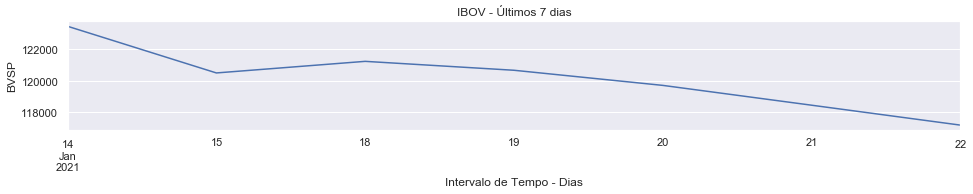

In [2]:
#2.1 - E podemos testar os últimos e os primeiros dados dentro do banco de dados
#2.1.1 - A cauda do IBOV(Os dados mais recentes)
ibov.tail(7)
# E aqui podemos ter acesso aos dados mais recentes do Ibov de forma gráfica, e no mesmo sentido podemos pegar qualquer intervalo de tempo maior ou menor que 5.
ibov.tail(7)["Close"].plot(figsize=(16,2))
plt.title("IBOV - Últimos 7 dias")
plt.xlabel("Intervalo de Tempo - Dias")
plt.ylabel("BVSP")

Text(0, 0.5, 'BVSP')

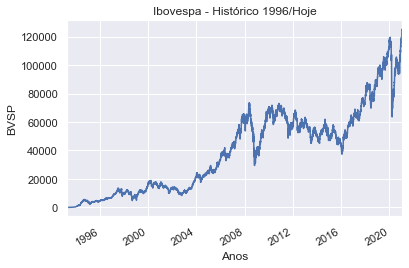

In [3]:
#Ibovespa Completo
ibov["Close"].plot()
plt.title("Ibovespa - Histórico 1996/Hoje")
plt.xlabel("Anos")
plt.ylabel("BVSP")

Text(0, 0.5, 'Inflação (%)')

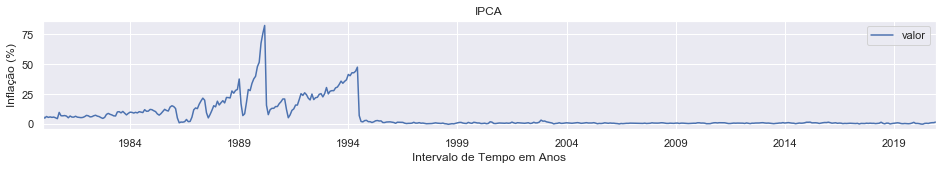

In [16]:
#Taxa IPCA desde sempre
ipca.plot(figsize=(16,2))
plt.title("IPCA")
plt.xlabel("Intervalo de Tempo em Anos")
plt.ylabel("Inflação (%)")

In [18]:
ipca

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2020-08-01,0.24
2020-09-01,0.64
2020-10-01,0.86


Text(0, 0.5, 'CDI (%)')

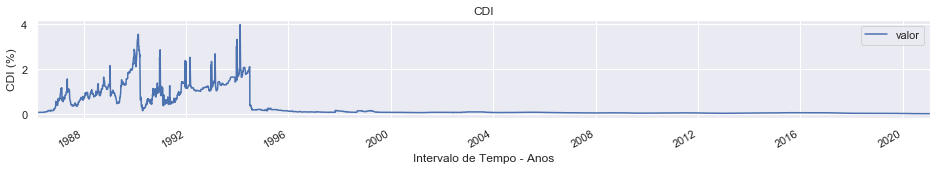

In [10]:
#Taxa CDI
cdi.plot(figsize=(16,2))
plt.title("CDI")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("CDI (%)")

In [ ]:
#Taxa IGPM
igpm.plot()
plt.title("IGPM")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("IGPM (%)")

Text(0, 0.5, 'Taxa SELIC (%)')

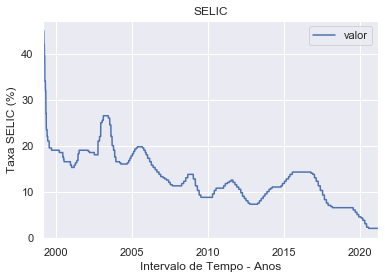

In [12]:
#Taxa SELIC - Valor esperado pelo BACEN
selic_meta.plot()
plt.title("SELIC")
plt.xlabel("Intervalo de Tempo - Anos")
plt.ylabel("Taxa SELIC (%)")

In [14]:
print(selic_meta)

            valor
data             
1999-03-05   45.0
1999-03-06   45.0
1999-03-07   45.0
1999-03-08   45.0
1999-03-09   45.0
...           ...
2021-03-13    2.0
2021-03-14    2.0
2021-03-15    2.0
2021-03-16    2.0
2021-03-17    2.0

[8049 rows x 1 columns]


In [ ]:
#Reservas Internacionais
reservas_internacionais.plot()

In [ ]:
#Pesquisa Nacional por Amostra de Domicílios - PNAD | IBGE
pnad

In [ ]:
#Aqui estipulamos uma data de início para calcular o retorno sobre o ibovespa a partir da coluna "Fechamento Ajustado"
data_inicio = '2000-01-01'

ibovretorno = yf.download(tickers='^BVSP')[['Adj Close']]
ibov_retorno = ibovretorno.pct_change()

#
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1


cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

ipca_acumulado = (1 + ipca[ipca.index >= data_inicio] / 100).cumprod()
ipca_acumulado.iloc[0] = 1


In [ ]:
#CDI vs. IPCA
fig, ax = plt.subplots()
ax.plot(ipca_acumulado)
ax.plot(cdi_acumulado)


In [ ]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);

In [ ]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(ipca_acumulado);

In [ ]:
#2.1.2 - Podemos também usar a função lambda para plotar variações pontuais dentro do intervalo desejado
pct_ibov = (ibov.Close/ibov.Open).apply(lambda x:x-1)*100
display(pct_ibov.tail(10))
#Por exemplo, observar graficamente os últimos 10 dias de variação do IBOV
pct_ibov.tail(10).plot(figsize=(8,2),title = 'IBOV')

In [ ]:
#Observe todo o histórico de oscilações pontuais do IBOV ao longo do tempo, é um gráfico com formato bem interessante.
#É interessante notar os anos com maior oscilação são os que possuem grandes quedas e grandes subidas.
pct_ibov.plot(figsize=(8,2),title = 'IBOV')

In [ ]:
#2.1.2 - A cabeça do IBOV (os dados mais antigos)
ibov.head(5)

In [ ]:
#E usando o comando plot e figsize, criamos um gráfico do fechamento do IBOV desde seu início em ~1995.
ibov["Close"].plot(figsize=(12,6))

In [ ]:
#Assim como é possível criarmos um gráfico de sua abertura todos os dias desde ~1995.
ibov["Open"].plot(figsize=(12,6))

In [ ]:
#E o fechamento ajustado
ibov["Adj Close"].plot(figsize=(12,6))

In [ ]:
#Podemos fatiar uma parte específica do ibovespa
ibovparcial = web.get_data_yahoo('^BVSP', start = '2020-01-01', end='2020-12-31')
ibovparcial["Close"].plot(figsize=(8,2))
ibovparcial["Close"].rolling(21).mean().plot(label="MM21")
ibovparcial["Close"].rolling(200).mean().plot(label="MM200")
ibovparcial["Close"].rolling(365).mean().plot(label="MM365")

In [ ]:
#Vídeo 2 - Definindo intervalos,
# calculando e plotando médias móveis
ibov["Close"].plot(figsize=(8,2), label="IBOV")
#O Comando rolling é usado para calcular a média móvel de X dias
ibov["Close"].plot(figsize=(8,2), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
ibov["Adj Close"].rolling(365).mean().plot(label="MM365")

In [ ]:
#Parcelas menores do IBOV, por exemplo entre 2008 e 2015
ibov_fatiado = ibov[(ibov.index.year >= 2019) & (ibov.index.year <=2020)] 
# Médias móveis relacionadas a parte que separei do IBOV. Posso analisar a média móvel entre 2019-2020. 
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
ibov_fatiado["Close"].rolling(365).mean().plot(label="MM365")
ibov_fatiado["Close"].plot(figsize=(8,2), label="IBOV20192020")

In [ ]:
#Podemos utilizar essa mesma técnica para verificar o IBOV em diferentes governos.
# Por exemplo, o IBOV durante o governo FHC
ibovFHC = ibov[(ibov.index.year >= 1995) & (ibov.index.year <= 2003)]
ibovFHC ["Adj Close"].plot(figsize=(8,2))
#E agora os dois mandatos do Governo Lula
ibovLula = ibov[(ibov.index.year >= 2003) & (ibov.index.year <=2010)]
ibovLula ["Adj Close"].plot(figsize=(8,2))
#O Primeiro mandato do Governo Dilma
ibovDilma1 = ibov[(ibov.index.year >=2010) & (ibov.index.year <= 2014)]
ibovDilma1 ["Adj Close"].plot(figsize=(8,2))
# O Segundo mandato até o Impeachment
ibovDilma2 = ibov[(ibov.index.year>=2014)&(ibov.index.year <= 2016)]
ibovDilma2 ["Adj Close"].plot(figsize=(8,2))
#Governo Temer 
ibovTemer = ibov[(ibov.index.year>=2016)&(ibov.index.year <= 2018)]
ibovTemer ["Adj Close"].plot(figsize=(8,2))
#Governo Bolsonaro
ibovBolsonaro = ibov[(ibov.index.year >=2018)]
ibovBolsonaro ["Adj Close"].plot(figsize=(8,2))

In [ ]:
# Por exemplo, o IBOV durante o governo FHC
ibovFHC = ibov[(ibov.index.year >= 1995) & (ibov.index.year <= 2003)]
ibovFHC ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#E agora os dois mandatos do Governo Lula
ibovLula = ibov[(ibov.index.year >= 2003) & (ibov.index.year <=2010)]
ibovLula ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#O Primeiro mandato do Governo Dilma
ibovDilma1 = ibov[(ibov.index.year >=2010) & (ibov.index.year <= 2014)]
ibovDilma1 ["Adj Close"].plot(figsize=(8,2))

In [ ]:
# O Segundo mandato até o Impeachment
ibovDilma2 = ibov[(ibov.index.year>=2014)&(ibov.index.year <= 2016)]
ibovDilma2 ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Governo Temer 
ibovTemer = ibov[(ibov.index.year>=2016)&(ibov.index.year <= 2018)]
ibovTemer ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Governo Bolsonaro
ibovBolsonaro = ibov[(ibov.index.year >=2018)]
ibovBolsonaro ["Adj Close"].plot(figsize=(8,2))

In [ ]:
#Podemos verificar como tem sido desde o ano de 2020.
ibov2020 = ibov[(ibov.index.year >=2020)]
ibov2020 ["Close"].plot(figsize=(8,2))

In [ ]:
ibov2019 = ibov[(ibov.index.year >= 2019)&(ibov.index.year <=2019)]
ibov2019 ["Close"].plot(figsize=(8,2))

In [ ]:
#Filtro por mês, sendo 12, todos os meses de dezembro
ibov_fatiado = ibov[ibov.index.month ==12]
ibov_fatiado.tail()

ibov_fatiado = ibov[ibov.index.month ==9]
ibov_fatiado.tail()

ibov_fatiado = ibov[ibov.index.month ==6]
ibov_fatiado.tail()


In [ ]:
ibov_fatiado = ibov[ibov.index.month ==3]
ibov_fatiado.tail()

In [ ]:
#Esse trecho permite carregar informações sobre um determinado FII dentro do intervalo de tempo desejado, assim como as stocks.
habt11 = web.get_data_yahoo('HABT11.SA', start='2020-02-01', end='2021-01-08')
tgar11 = web.get_data_yahoo('TGAR11.SA', start='2020-02-01', end='2021-01-08')
xplg11 = web.get_data_yahoo('XPLG11.SA', start='2020-02-01', end='2021-01-08')
mxrf11 = web.get_data_yahoo('MXRF11.SA', start='2020-02-01', end='2021-01-08')
flma11 = web.get_data_yahoo('FLMA11.SA', start='2020-02-01', end='2021-01-08')
knri11 = web.get_data_yahoo('KNRI11.SA', start='2020-02-01', end='2021-01-08')
bcff11 = web.get_data_yahoo('BCFF11.SA', start='2020-02-01', end='2021-01-08')
xpsf11 = web.get_data_yahoo('XPSF11.SA', start='2020-02-01', end='2021-01-08')
xpci11 = web.get_data_yahoo('XPCI11.SA', start='2020-02-01', end='2021-01-08')
xpml11 = web.get_data_yahoo('XPML11.SA', start='2020-02-01', end='2021-01-01')

In [ ]:
cotaxplg11 = xplg11["Close"].plot(figsize=(8,2), label="xplg11")

In [ ]:
cotaxpci11 = xpci11["Close"].plot(figsize=(8,2), label="xpci11")

In [ ]:
cotaxpsf11 = xpsf11["Close"].plot(figsize=(8,2), label="xpsf11")


In [ ]:
cotabcff11 = bcff11["Close"].plot(figsize=(8,2), label="bcff11")

In [ ]:
cotamxrf11 = mxrf11["Close"].plot(figsize=(8,2), label="mxrf11")

In [ ]:
cotaknri11 = knri11["Close"].plot(figsize=(8,2), label="knri11")

In [ ]:
tord11 = web.get_data_yahoo('TORD11.SA', start='2020-01-01', end='2020-12-31')
cotatord11 = tord11["Close"].plot(figsize=(8,2), title="tord11")

In [ ]:
#Ou podemos observar o valor de uma cotação de uma determinada ação dentro também de um intervalo específico e plotar seu valor dentro do intervalo que desejamos. Vou carregar o mesmo intervalo de tempo para todos os stocks abaixo e posteriormente plotar o gráfico com seu valor.
itsa4  = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
klbn4  = web.get_data_yahoo('KLBN4.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
wege3  = web.get_data_yahoo('WEGE3.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
grnd3  = web.get_data_yahoo("GRND3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
mrve3  = web.get_data_yahoo("MRVE3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
bbas3  = web.get_data_yahoo("BBAS3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
itub4  = web.get_data_yahoo("ITUB4.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
egie3  = web.get_data_yahoo("EGIE3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
sqia3  = web.get_data_yahoo("SQIA3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
bpan4  = web.get_data_yahoo("BPAN4.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
tpis3  = web.get_data_yahoo("TPIS3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
tris3  = web.get_data_yahoo("TRIS3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
jhsf3  = web.get_data_yahoo("JHSF3.SA", start=datetime.datetime(2020,1,1), end='2021-01-10')
bees3  = web.get_data_yahoo('BEES3.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')


In [ ]:
#Podemos verificar cada cota individualmente e isso facilita o trabalho de identificar seu preço ao longo do tempo
itsa4  = web.get_data_yahoo('ITSA4.SA', start=datetime.datetime(2020,1,1), end='2021-01-10')
cotaitsa4 = itsa4["Close"].plot(figsize=(8,2), title="ITSA4")

In [ ]:
# E podemos verificar suas variações pontuais a partir da função lambda, também dentro de intervalos de tempo específicos onde podemos consultar através do comando head e tail.
pct_itsa4 = (itsa4.Close/itsa4.Open).apply(lambda x:x-1)*100
display(pct_itsa4.head(10))
#Assim como podemos verificar suas oscilações pontualmente em cada dia, podemos verificar a oscilação ao longo dos dias em formato gráfico
pct_itsa4.plot(figsize=(8,2))

In [ ]:
#Exemplo mais eficiente de como observar a oscilação da cota dentro do intervalo de tempo do datetime.
vale3 = web.get_data_yahoo('VALE3.SA', start=datetime.datetime(2020,1,8), end=datetime.datetime(2021,1,1))
cotavale3 = vale3["Close"].plot(figsize=(8,2))
plt.title("Cotação - VALE3")
plt.xlabel("Anos")
plt.ylabel("Preço")

In [ ]:
# Variação % da Vale da Rio Doce
pct_vale3 = (vale3.Close/ vale3.Open).apply(lambda x:x-1)*100
display(pct_vale3.head(365))
pct_vale3.plot(figsize=(8,2))

In [ ]:

cotabees3 = bees3["Close"].plot(figsize=(8,2))
plt.title("BEES3 - banco do espírito santo")
plt.xlabel("Anos")
plt.ylabel("Preço")

In [ ]:
#Variação % da cotação
pct_bees3 = (bees3.Close/bees3.Open).apply(lambda x:x-1)*100
display(pct_bees3.head(10))
pct_bees3.plot(figsize=(8,2))

In [ ]:
abev3  = web.get_data_yahoo('ABEV3.SA', start=datetime.datetime(2020,1,1), end='2021-01-08')
pct_abev3 = (abev3.Close / abev3.Open).apply(lambda x:x-1)*100
display(pct_abev3.head(10))
pct_abev3.plot()

In [ ]:
# Agora preciso fazer o mesmo para todas as outras empresas para poder verificar suas oscilações pontuais.

In [ ]:
#Ativo Total - Total Assets
#Ativo Circulante - Current Assets
#Ativo Não Circulante - Non-current Assets
#Passivo Total - Total Liabilities
#Passivo Circulante - Current Liabilities
#Passivo Não Circulante - Non-current Liabilities
#Patrimônio Líquido - Net Worth


In [ ]:
#Agora vamos começar a usar a biblioteca fundamentos para puxar outras informações relevantes sobre uma empresa
ftsitub4 = fts.get_fundamentos('ITUB4')
# E daí usamos o print para exibir. 
print(ftsitub4)



In [ ]:
#Todos os fundamentos do primeiro trimestre de 2020
ftsitub41t20 = fts.get_fundamentos('ITUB4', year=2020, quarter=1)
#Todos os fundamentos dos terceiros trimestres ou de qualquer semestre específico, basta mudar o valor 3 por outro.
ftsitub43t = fts.get_fundamentos('ITUB4', quarter=3)


In [ ]:
#Fundamentos das empresas em carteira
#Todos os fundamentos históricos, anualmente
#O comando fts.get_fundamentos serve para puxar o fundamento da empresa.
ftsbees3 = fts.get_fundamentos('BEES3')
ftsabev3 = fts.get_fundamentos('ABEV3')
ftsklbn4 = fts.get_fundamentos('KLBN4')
ftswege3 = fts.get_fundamentos('WEGE3')
ftsjhsf3 = fts.get_fundamentos('JHSF3')
ftstris3 = fts.get_fundamentos('TRIS3')
ftstpis3 = fts.get_fundamentos('TPIS3')
ftsbpan4 = fts.get_fundamentos('BPAN4')
ftsitub4 = fts.get_fundamentos('ITUB4')
ftsrcsl4 = fts.get_fundamentos('RCSL4')
ftsoibr3 = fts.get_fundamentos('OIBR3')
ftsposi3 = fts.get_fundamentos('POSI3')
ftstaee3 = fts.get_fundamentos('TAEE3')
ftsengi4 = fts.get_fundamentos('ENGI4')
ftssula4 = fts.get_fundamentos('SULA4')
ftsslce3 = fts.get_fundamentos('SLCE3')
ftsegie3 = fts.get_fundamentos('EGIE3')
ftsbbas3 = fts.get_fundamentos('BBAS3')
ftsmrve3 = fts.get_fundamentos('MRVE3')
ftsgrnd3 = fts.get_fundamentos('GRND3')
ftsitsa4 = fts.get_fundamentos('ITSA4')
ftsigta3 = fts.get_fundamentos('IGTA3')


#Por alguma razão, o código SQIA não está funcionando, talvez não tenha a informação na base de dados.

In [ ]:
# E daí usamos o print para exibir a que desejarmos
print(ftsitub4)

In [ ]:
ftsbees3 = fts.get_fundamentos('BEES3')
print(ftsbees3)

In [ ]:
#Baixa todos os balanços anuais da empresa
balance1 = fts.get_balanco('ITUB4')
print(balance1)

In [ ]:
itub4  = web.get_data_yahoo("ITUB4.SA", start='2019-01-01', end='2019-12-31')
cotaitub4 = itub4["Close"].plot(figsize=(8,2))

In [ ]:
#Dívidendos pagos
ftsitub4['Dividendos']
plt.hist(ftsitub4['Dividendos'])

In [ ]:
#Escala do gráfico está errada se plotar todas as variáveis juntas
# Por isso plotamos cada coluna separadamente, DYpago está em reais, Payout como todos apresentam um valor 0 < x < 1 assumo que seja uma porcentagem não convertida. Agora, a exponencial no Dividendos e JCP não faz sentido. 
ftsitub4['Dividendos','DY'].plot(figsize=(8,2))

In [ ]:
print(ftsbees3)

In [ ]:
cotaitub4 = itub4["Close"].plot(figsize=(8,2), label="ITUB4")

In [ ]:
cotaitsa4 = itsa4["Close"].plot(figsize=(8,2), label="ITSA4")